In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [6]:
data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')
#all column names: id	category	title	body	amenities	bathrooms	bedrooms	currency	fee	has_photo	pets_allowed	price	price_display	price_type	square_feet	address	cityname	state	latitude	longitude	source	time
data

C:\Users\baran\AppData\Local\Temp\ipykernel_19444\869177105.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [7]:
#if amenities is missing, replace with 0
data['amenities'] = data['amenities'].fillna(0)

#delete rows with missing values
data = data.dropna()
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",0,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",0,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",0,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",0,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
5,5668639368,housing/rent/apartment,Two BR 7801 Marble NE,"This unit is located at 7801 Marble NE, Albuqu...",0,1.5,2.0,USD,No,Thumbnail,...,"$1,250",Monthly,965,7801 Marble NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83473,5126377625,housing/rent/apartment,Two BR For Rent In College Terrace neighborhood,San Francisco Great opportunity in the highly ...,"Parking,Refrigerator,Wood Floors",1.0,2.0,USD,No,Thumbnail,...,"$2,800",Monthly,1190,1251 College Avenue Palo Alto CA 94306,Palo Alto,CA,37.4169,-122.1292,RentDigs.com,1544606138
83477,5125234615,housing/rent/apartment,Sonterra Apartment Homes,Austin $500 off December Rent!!! Contact now t...,"AC,Clubhouse,Dishwasher,Fireplace,Gated,Gym,In...",1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,692,8801 N Fm 620,Austin,TX,30.4268,-97.8423,RentDigs.com,1544520585
83486,5124209470,housing/rent/apartment,Lisa Alexander,"Monongahela Country living, deadend street, fr...","Cable or Satellite,Patio/Deck,Washer Dryer",1.0,2.0,USD,No,Thumbnail,...,$600,Monthly,1500,728 Ellen St,Monongahela,PA,40.1956,-79.9301,RentDigs.com,1544433492
83490,5126787037,housing/rent/apartment,Gables Old Town North - JR1-A,Gables Old Town North embraces its historic se...,"Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,1.0,USD,No,Thumbnail,...,"$2,313 - $2,713",Monthly,663,525 Montgomery St,Alexandria,VA,38.8019,-77.0508,RENTCafé,1544629678


<Axes: >

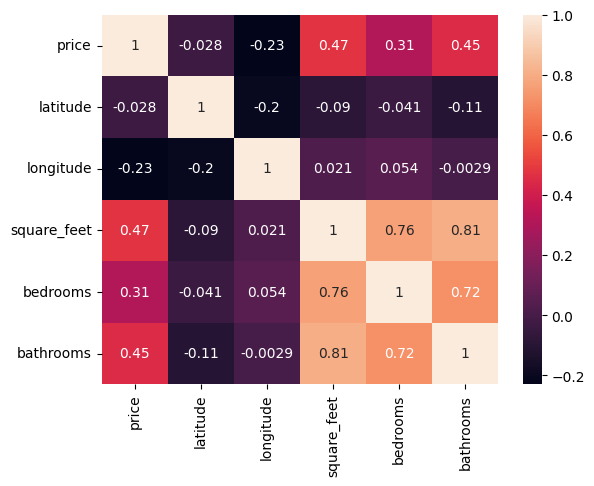

In [8]:
#generate heatmap for correlation matrix price latitude longitude square_feet bedrooms bathrooms

#correlation matrix
corr = data[['price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms']].corr()
corr

#heatmap
sns.heatmap(corr, annot=True)

In [9]:
#implemnt one hot encoding for amenities 
amenities = data['amenities'].str.get_dummies(sep=',')
data = pd.concat([data, amenities], axis=1)
data = data.drop(columns=['amenities'])
data

,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",1.0,1.0,USD,No,Thumbnail,Cats,...,0,0,0,0,0,0,0,0,0,0
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",...,0,0,0,0,0,0,0,0,0,0
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",...,0,0,0,0,0,0,0,0,0,0
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,0,0,0,0,0,0,0,0,0,0
5,5668639368,housing/rent/apartment,Two BR 7801 Marble NE,"This unit is located at 7801 Marble NE, Albuqu...",1.5,2.0,USD,No,Thumbnail,"Cats,Dogs",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83473,5126377625,housing/rent/apartment,Two BR For Rent In College Terrace neighborhood,San Francisco Great opportunity in the highly ...,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",...,0,0,0,1,0,0,0,0,0,1
83477,5125234615,housing/rent/apartment,Sonterra Apartment Homes,Austin $500 off December Rent!!! Contact now t...,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,1,0,1,0,0,0,0,0,1,1
83486,5124209470,housing/rent/apartment,Lisa Alexander,"Monongahela Country living, deadend street, fr...",1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",...,1,0,0,0,0,0,0,0,1,0
83490,5126787037,housing/rent/apartment,Gables Old Town North - JR1-A,Gables Old Town North embraces its historic se...,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,1,0,1,1,0,0,0,0,0,0


<Axes: >

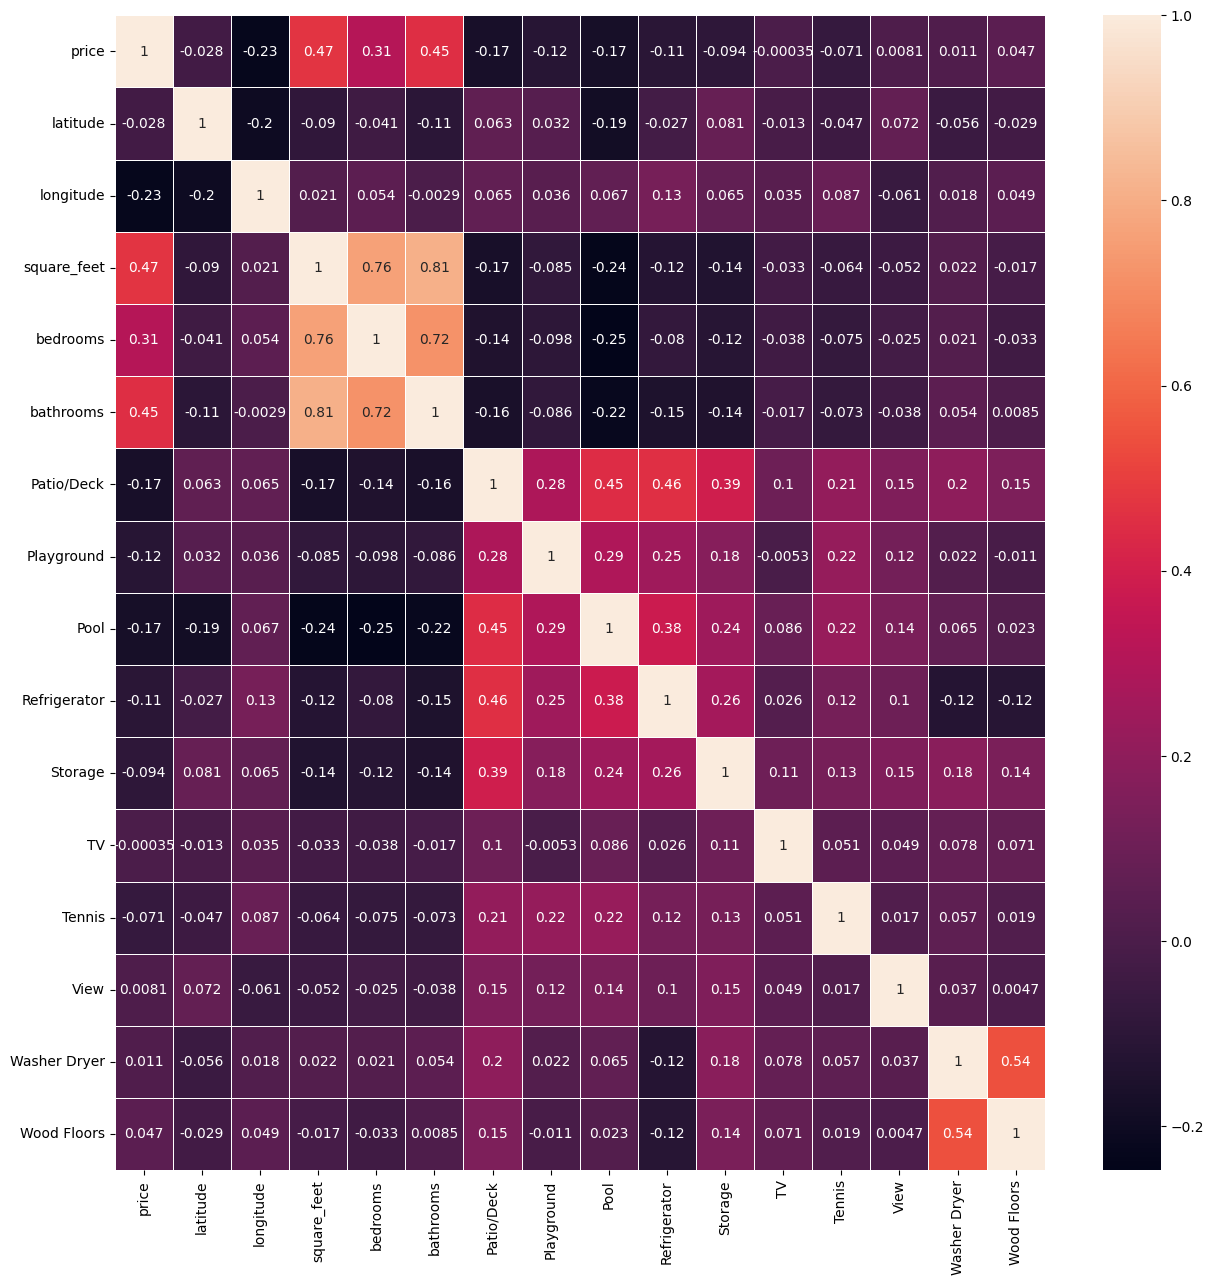

In [10]:
#correlation matrix with amenities included (Patio/Deck	Playground	Pool	Refrigerator	Storage	TV	Tennis	View	Washer Dryer	Wood Floors )
corr = data[['price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors']].corr()
corr
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
#heatmap with small text
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)

<Axes: xlabel='state', ylabel='price'>

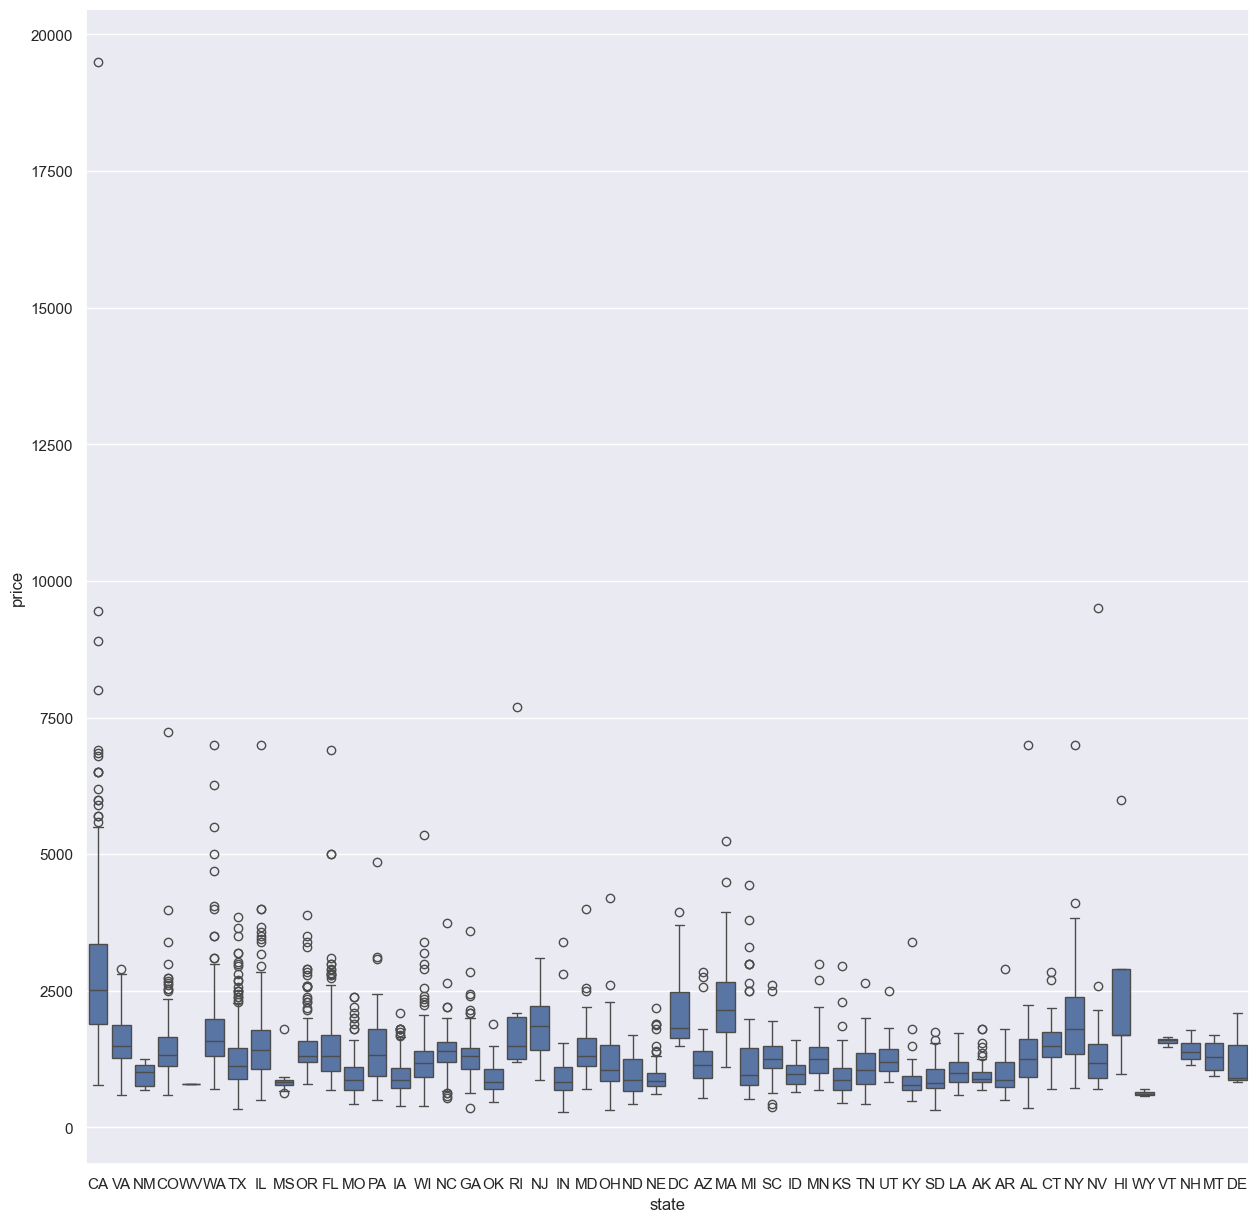

In [11]:
#generate boxplot for price based on state
sns.set_theme(rc={'figure.figsize':(15,15)})
sns.boxplot(x='state', y='price', data=data)

<Axes: >

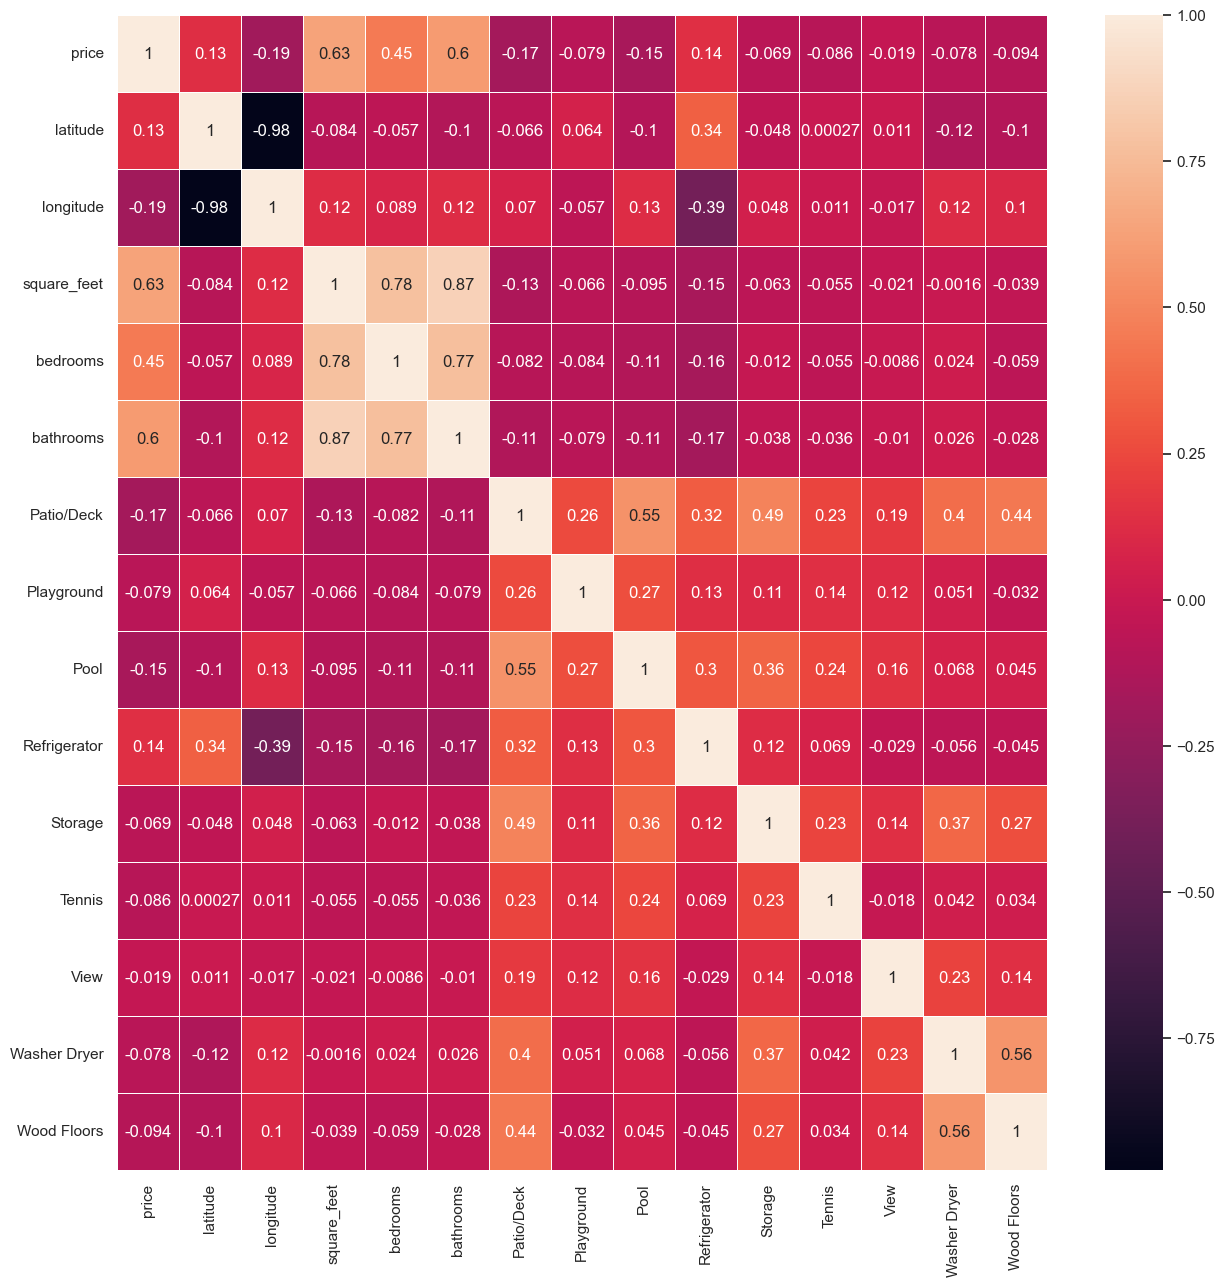

In [12]:
#take only CA as state and run correlation matrix of price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'Tennis', 'View', 'Washer Dryer', 'Wood Floor
data_CA = data[data['state'] == 'CA']
corr = data_CA[['price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors']].corr()
corr
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
#heatmap with small text
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)



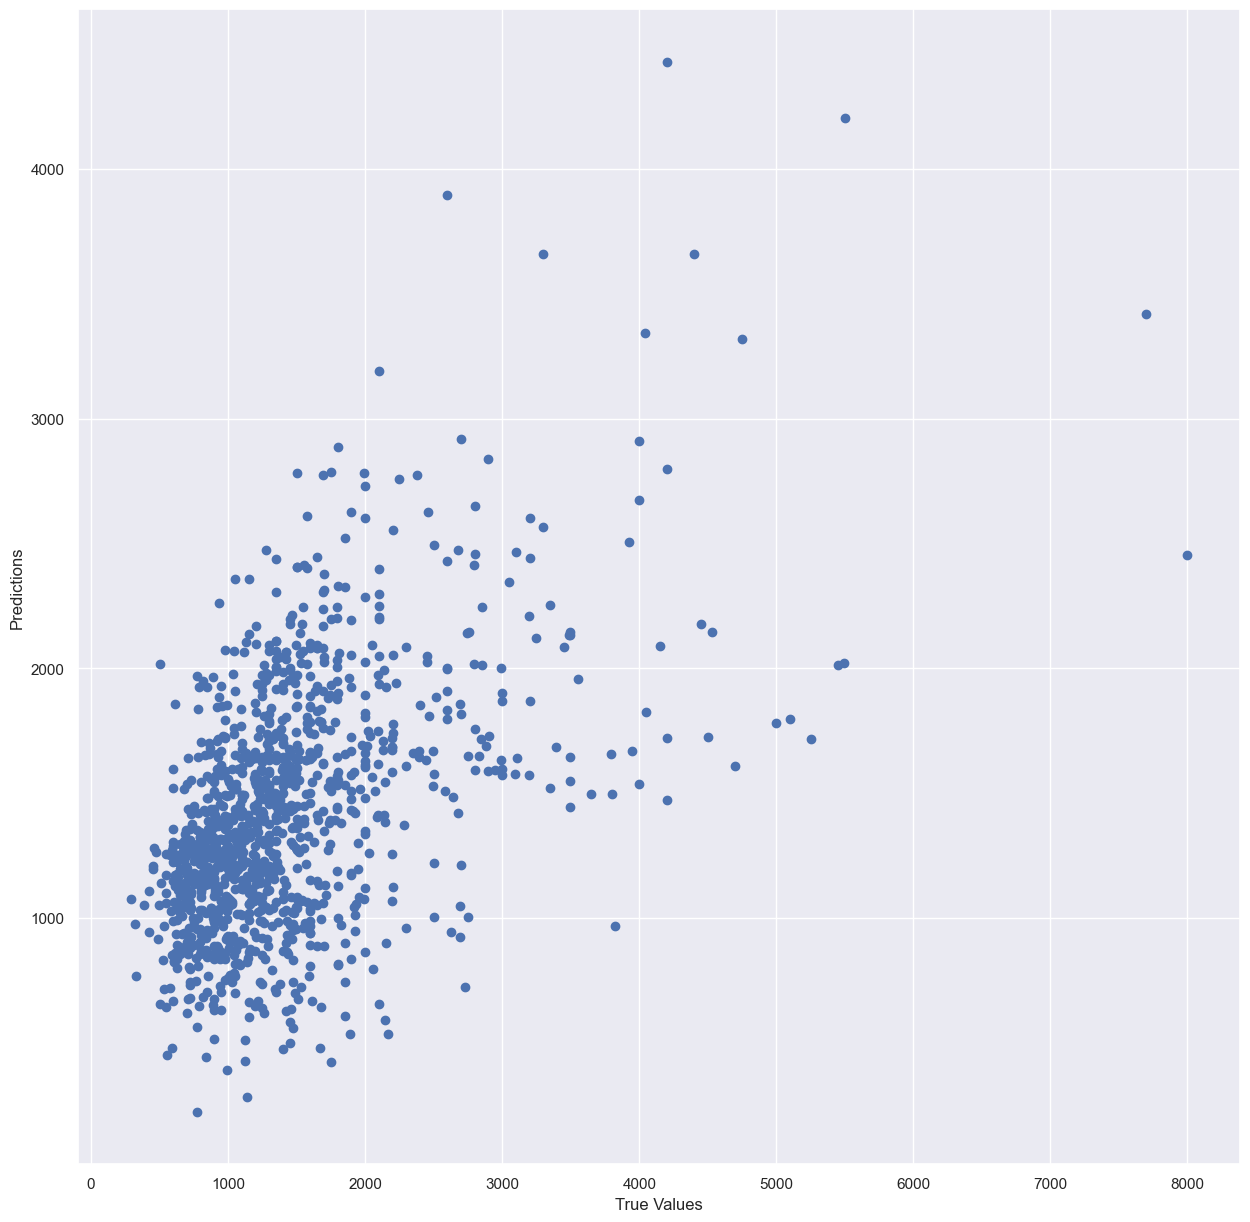

In [ ]:
#put it in regression model to predict price with quarter of data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)
#show the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
